In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
data = pd.read_csv("brain_dataset.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
# statistical description of data
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [4]:
# dataset shape
print("Total {} rows and {} colums".format(data.shape[0], data.shape[1]))

Total 237 rows and 4 colums


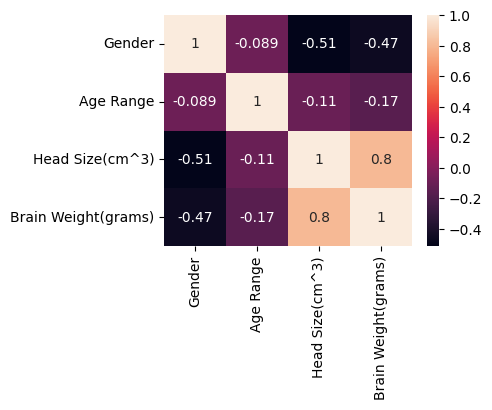

In [22]:
# Correlation matrix to decide which variables to use
plt.figure(figsize=(4, 3))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
# initializing inputs
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

In [6]:
x_ = np.mean(X)
y_ = np.mean(Y)

In [9]:
# define b1 and b0
rise = sum([(x - x_) * (y - y_) for x, y in zip(X, Y)])
run = sum([(x - x_) ** 2 for x, y in zip(X, Y)])
b1 = rise / run
b0 = y_ - (b1 * x_)

In [10]:
# display the coefficients
print("Coefficients:")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  325.57342104944223
b1 :  0.26342933948939945


In [11]:
# plotting values
x_min = np.min(X) - 100 
x_max = np.max(X) + 100

This adjustment of 100 is commonly used to add a buffer or padding to the range of values being plotted on an axis. By adding 100 to the maximum value, it ensures that the plotted data points are not too close to the edge of the plot, providing some space for visual clarity.

In [12]:
# calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = (b0 + (b1 * x))

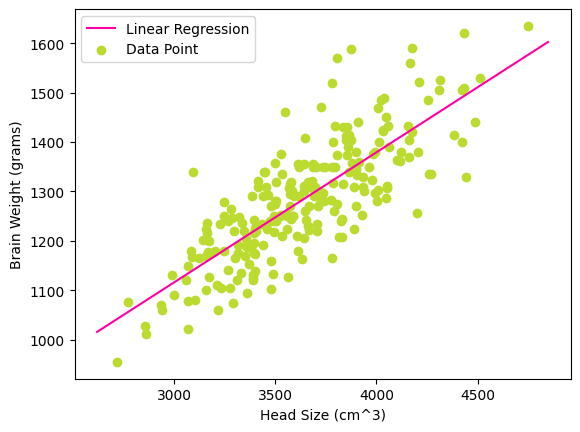

In [18]:
#plotting line 
plt.plot(x, y, color='#ff00a2', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#bcdb30', label='Data Point')

# x-axis label
plt.xlabel('Head Size (cm^3)')

#y-axis label
plt.ylabel('Brain Weight (grams)')

plt.legend()
plt.show()

In [27]:
# calculate RMSE
rmse = 0
n = len(X)
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)

print(rmse)

72.1206213783709


In [29]:
# calcuate score
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)

print(score)

0.6393117199570003


In [30]:
# Calculate regression using sklearn for verification and comparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = data["Head Size(cm^3)"].values
target = data["Brain Weight(grams)"].values
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.639311719957
